In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Task 1

White on black

In [2]:
table = [0 if (x>700 or x>300 or y <250) and (y<1750 or x>1000) else 255.0 for y in range(2048) for x in range (2048)]
start_image = np.array(table).reshape(2048, 2048)

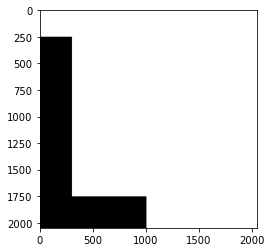

In [3]:
plt.imshow(start_image, cmap="Greys")
plt.show()

## Task 2 - one single contraction

In [4]:
A = 0.0
B = -0.5
C = 0.5
D = 0
E = 0.5
F = 0



In [5]:
def single_contraction(image):
    new_image = np.ones(shape=(2048, 2048))
    for x in range(2048):
        for y in range(2048):
            if image[x,y] > 0.0:
                _x = x*A + y*B + E
                _y = x*C + y*D + F
                new_image[int(_x), int(_y)] = 0
            
            
    return new_image

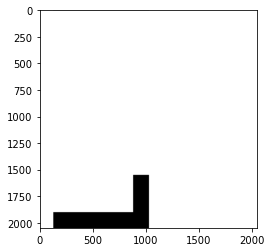

In [6]:
n_image = single_contraction(image=start_image)
plt.imshow(n_image, cmap="gray")
plt.show()

## Task 3 - 3 contractions

In [7]:
A1 = 0.0
B1 = -0.5
C1 = 0.5
D1 = 0
E1 = 0.5
F1 = 0

A2 = 1
B2 = -0.5
C2 = 0.7
D2 = 1.1
E2 = 1.1
F2 = 1

A3 = 0.2
B3 = -0.5
C3 = 0.1
D3 = 0.2
E3 = 0.1
F3 = -0.2

In [8]:
def w_function(x, y, a, b, c, d, e, f):
    _x = x*a + y*b + e 
    _y = x*c + y*d + f
    return _x, _y 

In [9]:
def three_contractions(image):
    new_image = np.ones(shape=(2048, 2048))
    for x in range(2048):
        for y in range(2048):
            if image[x,y] > 0.0:
                _x1, _y1 = w_function(x, y, a=A1, b=B1, c=C1, d=D1, e=E1, f=F1)
                new_image[int(_x1), int(_y1)] = 0

                _x2, _y2 = w_function(x, y, a=A2, b=B2, c=C2, d=D2, e=D2, f=F2)
                if 2048>_x2>=0 and 2048>_y2>=0:
                    new_image[int(_x2), int(_y2)] = 0

                _x3, _y3 = w_function(x, y, a=A3, b=B3, c=C3, d=D3, e=D3, f=F3)
                if 2048>_x3>=0 and 2048>_y3>=0:
                    new_image[int(_x3), int(_y3)] = 0
              
    return new_image


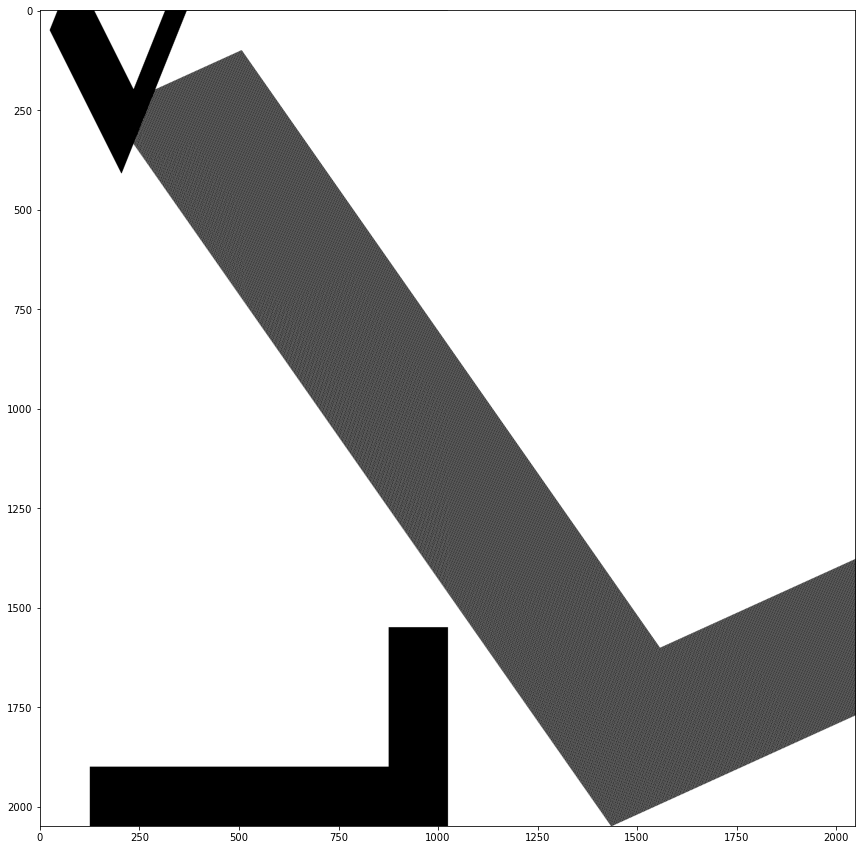

In [10]:
n_image_3cont = three_contractions(image=start_image)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(n_image_3cont, cmap="gray")
plt.show()

## Task 4 - n contractions

In [11]:
table = [0 if (x>700 or x>300 or y <250) and (y<1750 or x>1000) else 255.0 for y in range(2048) for x in range (2048)]
start_image2 = np.array(table).reshape(2048, 2048)

In [12]:
def n_iterations_contraction(image, iters):
    new_image = np.zeros(shape=(2048, 2048))
    for n in range(iters):
        print("Iteration:", n)
        if n >0:
            _image = new_image
        else: 
            _image = image
        for x in range(2048):
            for y in range(2048):
                if _image[x,y] > 0:
                    _x1, _y1 = w_function(x, y, a=A1, b=B1, c=C1, d=D1, e=E1, f=F1)
                    new_image[int(_x1), int(_y1)] = 255.0

    return new_image

Iteration: 0
Iteration: 1


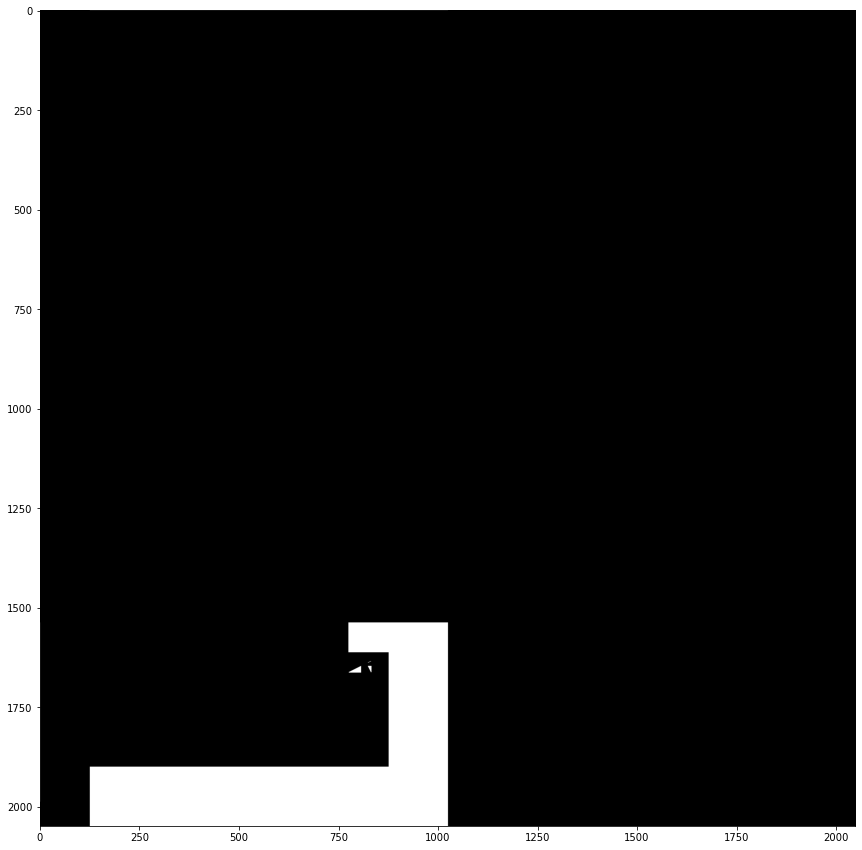

In [13]:
two_iter_image = n_iterations_contraction(image=start_image2, iters=2)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(two_iter_image, cmap="gray")
plt.show()

Iteration: 0
Iteration: 1
Iteration: 2


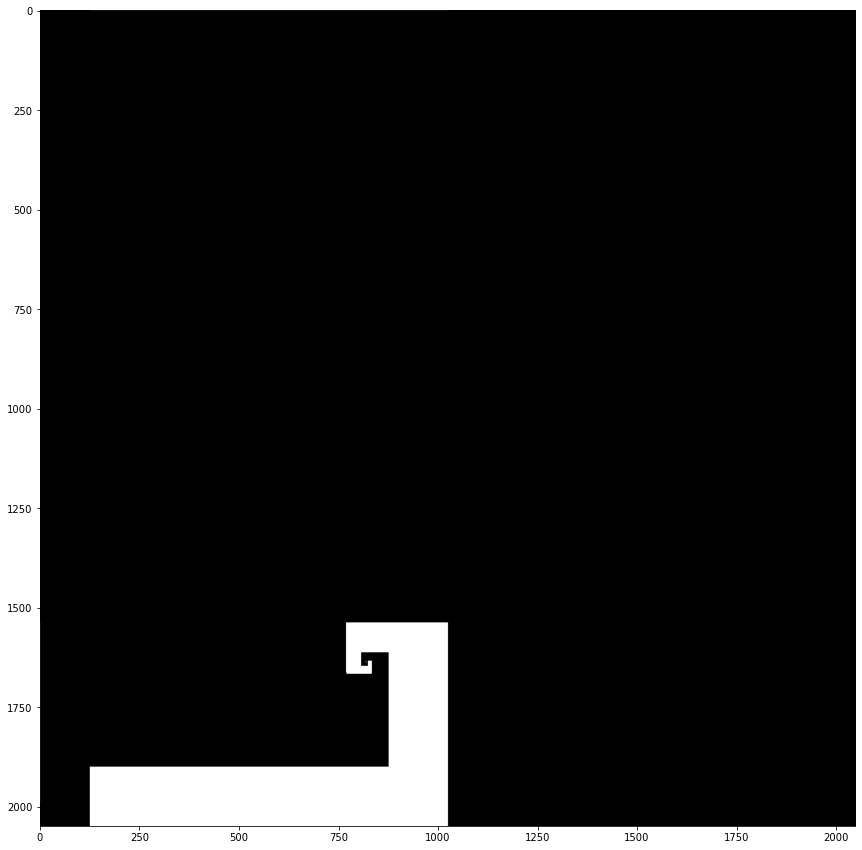

In [14]:
three_iter_image = n_iterations_contraction(image=start_image2, iters=3)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(three_iter_image, cmap="gray")
plt.show()

## Task 5 - Selected first 3 configurations

In [15]:
AS = [0.0, 0, 0.5]
BS = [-0.5, 0.5, 0]
CS = [0.5, -0.5, 0]
DS = [0, 0, 0.5]
ES = [0.5, 0.5, 0.25]
FS = [0, 0.5, 0.5]


In [16]:
table = [0 if (x>700 or x>300 or y <250) and (y<1750 or x>1000) else 255.0 for y in range(2048) for x in range (2048)]
start_image3 = np.array(table).reshape(2048, 2048)

In [17]:
def contractions_with_first_pattern(image, depth_iters, param_iters):
    new_image = np.zeros(shape=(2048, 2048))
    for m in range(depth_iters):
        print("Iteration:", m)
        if m >0:
            _image = new_image
        else: 
            _image = image
        for n in range(param_iters):
            print("     Pattern iter:", n)
            if n>3:
                break
            for x in range(2048):
                for y in range(2048):
                    if _image[x,y] > 0:
                        _x1, _y1 = w_function(x, y, a=AS[n], b=BS[n], c=CS[n], d=DS[n], e=ES[n], f=FS[n])
                        # if 2048>_x1>=0 and 2048>_y1>=0:
                        new_image[int(_x1), int(_y1)] = 255.0
    return new_image

Iteration: 0
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
Iteration: 1
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
Iteration: 2
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
Iteration: 3
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2


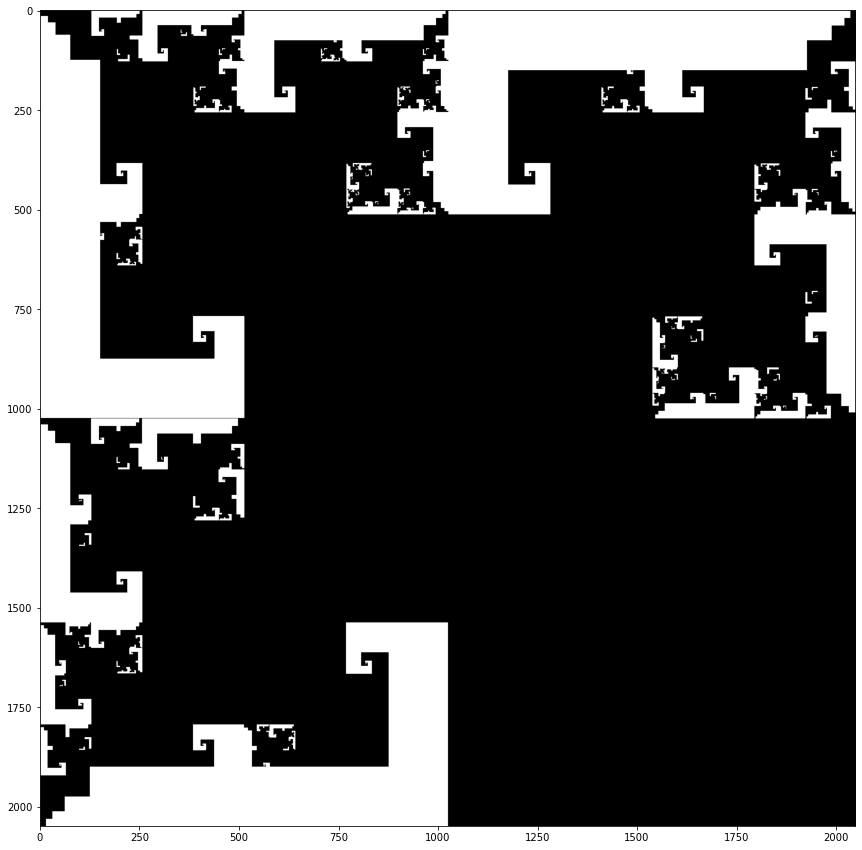

In [18]:
pattern_image = contractions_with_first_pattern(image=start_image3, depth_iters=4, param_iters=3)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(pattern_image, cmap="gray")
plt.show()

## Task 5 - Selected latter 4 configurations.

In [19]:
AS = [0.849, 0.197, -0.150, 0.000]
BS = [0.037, -0.226, 0.283, 0]
CS = [-0.037, 0.226, 0.260, 0]
DS = [0.849, 0.197, 0.237, 0.160]
ES = [0.075, 0.400, 0.575, 0.5]
FS = [0.1830, 0.049, -0.084, 0]

In [20]:
def contractions_with_second_pattern(image, depth_iters, param_iters):
    new_image = np.zeros(shape=(2048, 2048))
    for m in range(depth_iters):
        print("Iteration:", m)
        if m >0:
            _image = new_image
        else: 
            _image = image
        for n in range(param_iters):
            print("     Pattern iter:", n)
            if n>4:
                break
            for x in range(2048):
                for y in range(2048):
                    if _image[x,y] > 0:
                        _x1, _y1 = w_function(x, y, a=AS[n], b=BS[n], c=CS[n], d=DS[n], e=ES[n], f=FS[n])
                        new_image[int(_x1), int(_y1)] = 255.0

    return new_image

Iteration: 0
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 1
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 2
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 3
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3


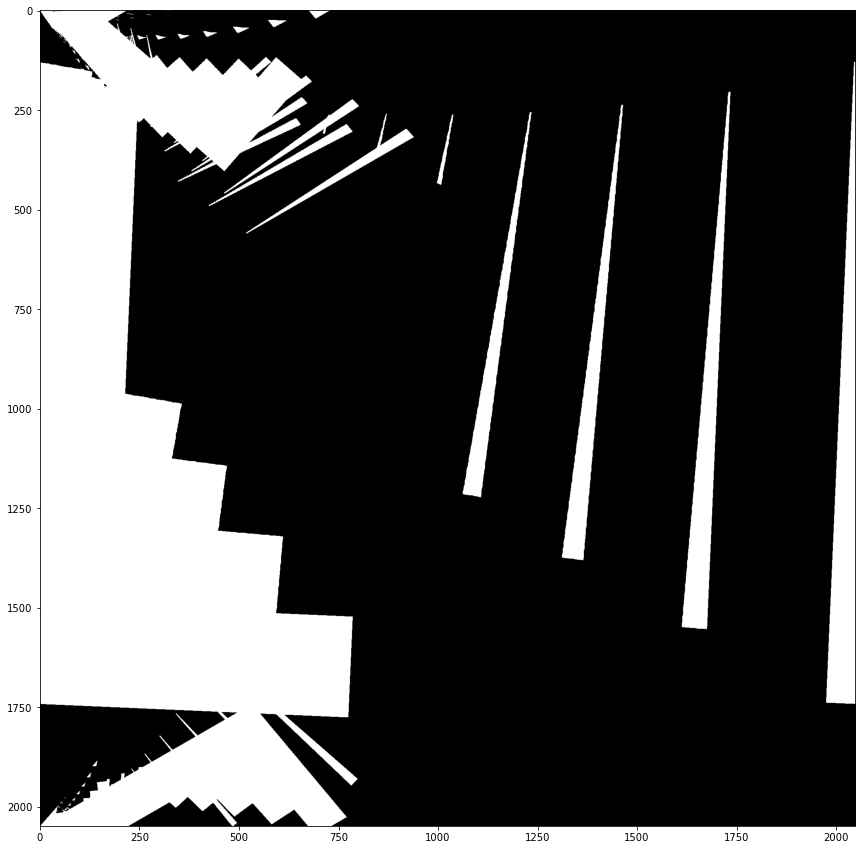

In [21]:
pattern_image = contractions_with_second_pattern(image=start_image3, depth_iters=4, param_iters=4)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(pattern_image, cmap="gray")
plt.show()

## Task 6 - task 5 variation with each iteration having different colour on the gray scale.

This way one can see how iterations are overlaying themselves.

Additional parameter:

In [22]:
AS = [0.0, 0, 0.5, 0.5]
BS = [-0.5, 0.5, 0, 0.5]
CS = [0.5, -0.5, 0, 0]
DS = [0, 0, 0.5, 0.5]
ES = [0.5, 0.5, 0.25, 0.25]
FS = [0, 0.5, 0.5, 0]

In [23]:
def contractions_with_first_pattern(image, depth_iters, param_iters):
    new_image = np.zeros(shape=(2048, 2048))
    for m in range(depth_iters):
        print("Iteration:", m)
        if m >0:
            _image = new_image
        else: 
            _image = image
        for n in range(param_iters):
            print("     Pattern iter:", n)
            if n>4:
                break
            for x in range(2048):
                for y in range(2048):
                    if _image[x,y] > 0:
                        _x1, _y1 = w_function(x, y, a=AS[n], b=BS[n], c=CS[n], d=DS[n], e=ES[n], f=FS[n])
                        
                        new_image[int(_x1), int(_y1)] = (255.0/(n+1))
    return new_image

Iteration: 0
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 1
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 2
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 3
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3


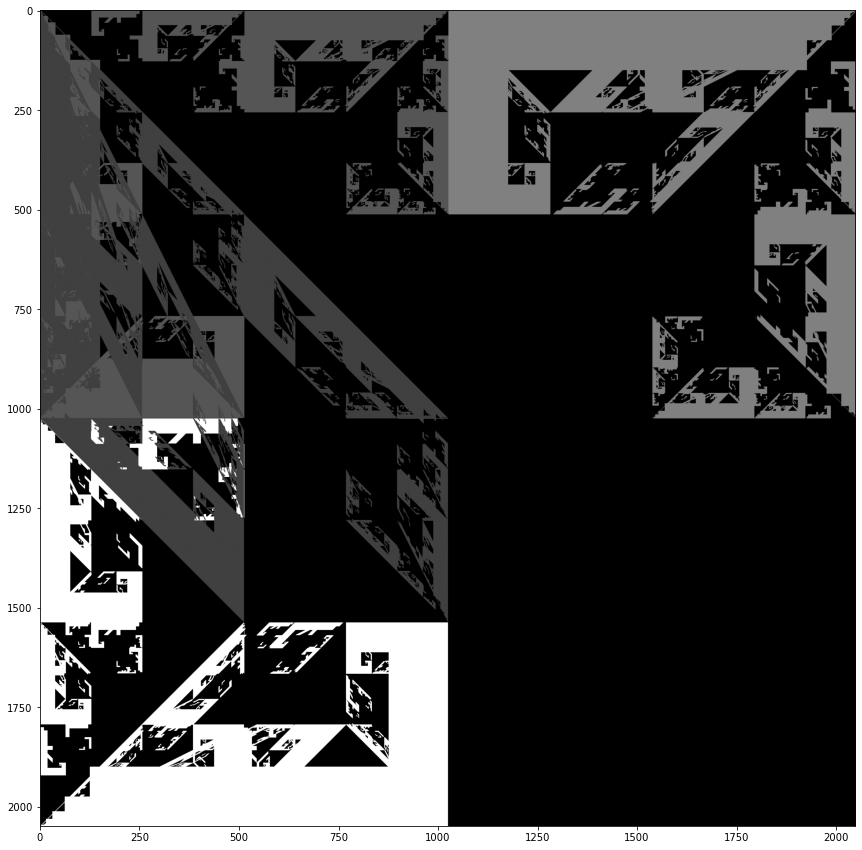

In [24]:
pattern_image = contractions_with_first_pattern(image=start_image3, depth_iters=4, param_iters=4)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(pattern_image, cmap="gray")
plt.show()

Iteration: 0
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 1
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 2
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
Iteration: 3
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3


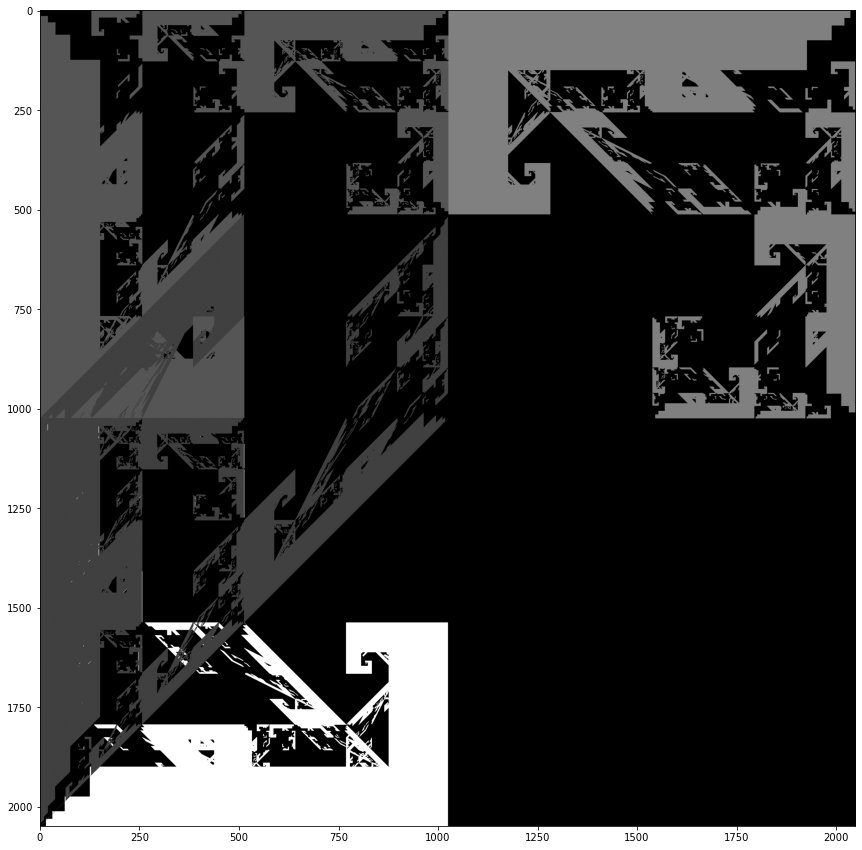

In [25]:
AS = [0.0, 0, 0.5, -0.5]
BS = [-0.5, 0.5, 0, -0.5]
CS = [0.5, -0.5, 0, 0]
DS = [0, 0, 0.5, 0.5]
ES = [0.5, 0.5, 0.25, -0.25]
FS = [0, 0.5, 0.5, 0]

pattern_image = contractions_with_first_pattern(image=start_image3, depth_iters=4, param_iters=4)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(pattern_image, cmap="gray")
plt.show()

Additional parameters:

In [26]:
AS = [0.849, 0.197, -0.150, 0.000, 1]
BS = [0.037, -0.226, 0.283, 0, -0.5]
CS = [-0.037, 0.226, 0.260, 0, 0.7]
DS = [0.849, 0.197, 0.237, 0.160, 1.1]
ES = [0.075, 0.400, 0.575, 0.5, 1.1]
FS = [0.1830, 0.049, -0.084, 0, 1]

In [27]:
def contractions_with_second_pattern(image, depth_iters, param_iters=5):
    new_image = np.zeros(shape=(2048, 2048))
    for m in range(depth_iters):
        print("Iteration:", m)
        if m >0:
            _image = new_image
        else: 
            _image = image
        for n in range(param_iters):
            print("     Pattern iter:", n)
            if n>5:
                break
            for x in range(2048):
                for y in range(2048):
                    if _image[x,y] > 0:
                        _x1, _y1 = w_function(x, y, a=AS[n], b=BS[n], c=CS[n], d=DS[n], e=ES[n], f=FS[n])
                        if 2048>_x1>=0 and 2048>_y1>=0:
                            new_image[int(_x1), int(_y1)] = (255.0/(n+1))

    return new_image

Iteration: 0
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
     Pattern iter: 4
Iteration: 1
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
     Pattern iter: 4
Iteration: 2
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
     Pattern iter: 4
Iteration: 3
     Pattern iter: 0
     Pattern iter: 1
     Pattern iter: 2
     Pattern iter: 3
     Pattern iter: 4


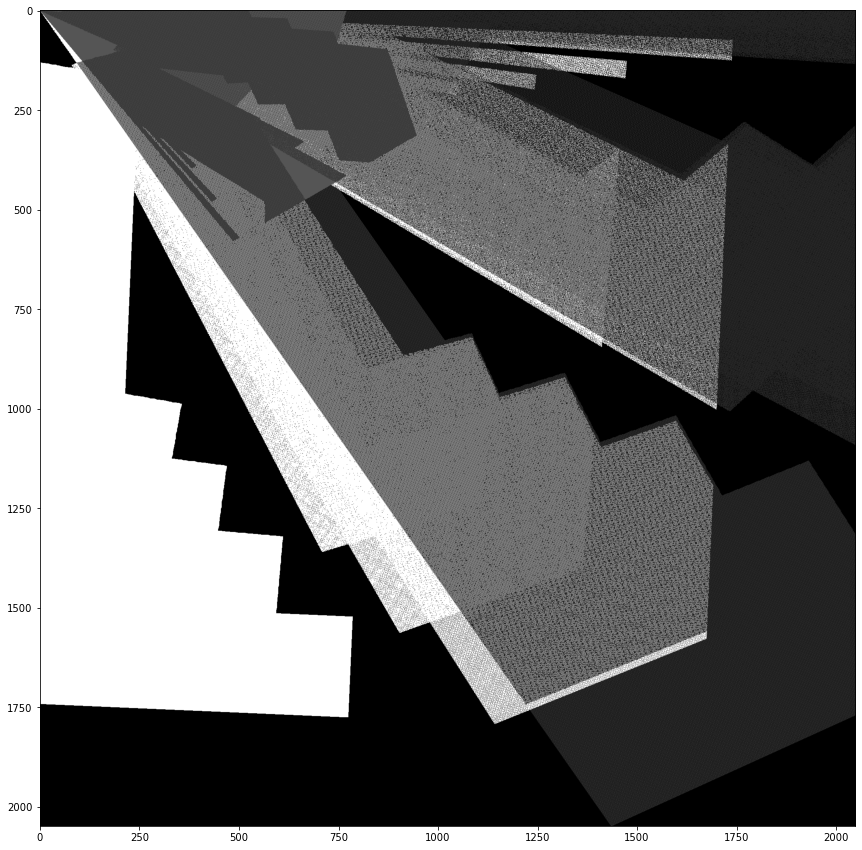

In [28]:
pattern_image = contractions_with_second_pattern(image=start_image3, depth_iters=4)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(pattern_image, cmap="gray")
plt.show()